# Heart Disease Prediction
Data Science Nigeria X Microsoft 2024 AI Bootcamp Qualification Hackathon on ZINDI

. [Project Link on Zindi](https://zindi.africa/competitions/microsoft-x-data-science-nigeria-2024-ai-bootcamp-qualification-hackathon)

## Author: Collins Emezie Ugwuozor

. [Linkedin](https://www.linkedin.com/in/collins-ugwuozor)

. [Github](https://github.com/ClassicCollins)

. [Twitter](https://x.com/ClassicCollins2)

. ugwuozorcollinsemezie@gmail.com

# Importing Libraries
We start by importing the necessary libraries for data manipulation, visualization, and model building.


In [2]:
# Import Libraries
import sys
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Model Evaluation
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Loading the Data
loaded the train, test, and sample submission datasets.

In [3]:
train_df = pd.read_csv("Train_Dataset.csv")
test_df = pd.read_csv("Test_Dataset.csv")
sample_sub = pd.read_csv("Sample_Submission.csv")
variable_definitions = pd.read_csv("Variable_Definitions.csv")

### Dataset Description


The dataset includes 14 numeric variables in both the training and test datasets:

- Id/id: Identifier of the individual.
- Age: Age of the individual.
- Sex: Gender (0 = female, 1 = male).
- cp: Chest pain type (categorical).
- trestbps: Resting blood pressure.
- chol: Serum cholesterol in mg/dl.
- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- restecg: Resting electrocardiographic results (categorical).
- thalach: Maximum heart rate achieved.
- exang: Exercise induced angina (1 = yes, 0 = no).
- oldpeak: ST depression induced by exercise relative to rest.
- slope: Slope of the peak exercise ST segment.
- ca: Number of major vessels (0-4) colored by fluoroscopy.
- thal: Thalassemia (categorical).
- target (train only): Presence of heart disease (0 = no, 1 = yes).

In [4]:
train_df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
train_df.shape

(7303, 15)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [7]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(train_df.shape)')
print (train_df.loc[1])

format(train_df.shape)
Id          11275.0
Age            53.0
Sex             1.0
cp              2.0
trestbps      198.0
chol          154.0
fbs             0.0
restecg         1.0
thalach       104.0
exang           0.0
oldpeak         0.8
slope           2.0
ca              1.0
thal            0.0
target          0.0
Name: 1, dtype: float64


In [8]:
test_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [9]:
test_df.shape

(2697, 14)

In [10]:
sample_sub.shape

(2697, 1)

In [11]:
variable_definitions

,Variable defination
0,age
1,sex
2,chest pain type (4 values)
3,resting blood pressure
4,serum cholestoral in mg/dl
5,fasting blood sugar > 120 mg/dl
6,resting electrocardiographic results (values 0...
7,maximum heart rate achieved
8,exercise induced angina
9,oldpeak = ST depression induced by exercise re...


# Exploratory Data Analysis (EDA)
Let's explore the training data to understand the relationships and distributions of features.


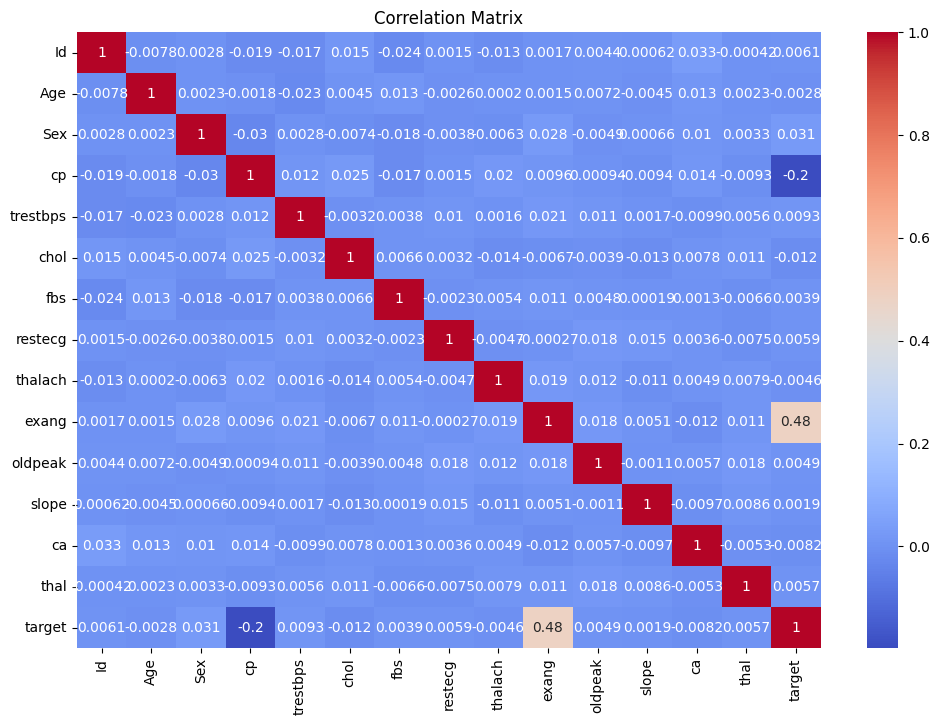

In [12]:
correlation = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Calculate the correlation of features with the label 'Target'
correlation_with_target = train_df.corr()['target'].sort_values(ascending=False)
correlation_with_target

target      1.000000
exang       0.481897
Sex         0.030608
trestbps    0.009320
Id          0.006148
restecg     0.005911
thal        0.005709
oldpeak     0.004899
fbs         0.003925
slope       0.001909
Age        -0.002846
thalach    -0.004634
ca         -0.008244
chol       -0.012291
cp         -0.198082
Name: target, dtype: float64

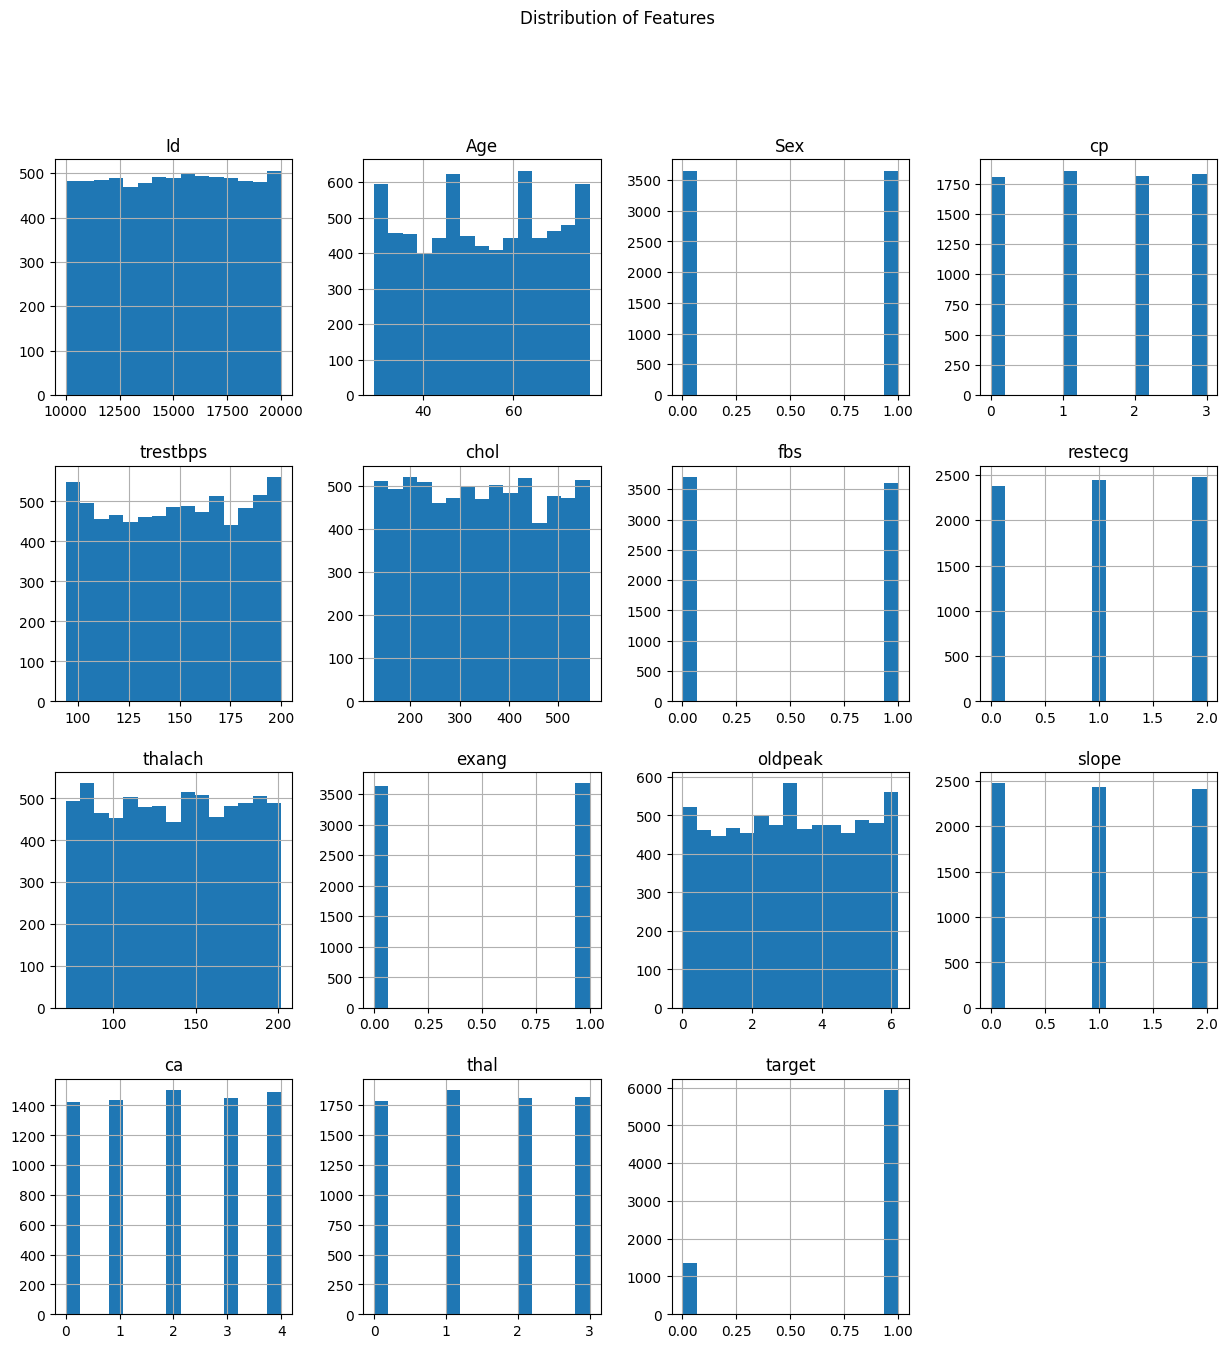

In [14]:
# Plot histograms for numerical features
features = train_df.columns.to_list()
train_df[features].hist(figsize=(15, 15), bins=15)
plt.suptitle('Distribution of Features')
plt.show()


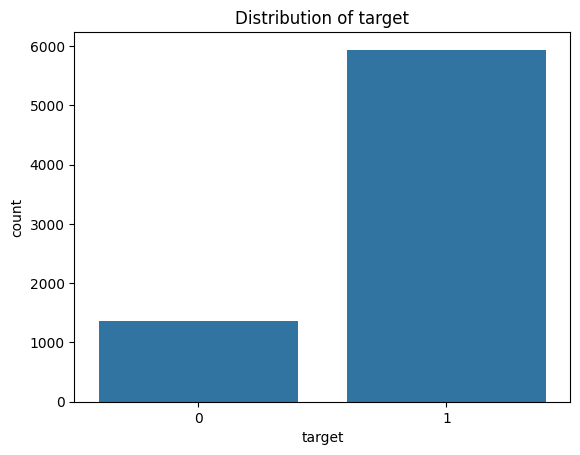

In [15]:
# Visualizing the target variable
sns.countplot(x='target', data=train_df)
plt.title('Distribution of target')
plt.show()

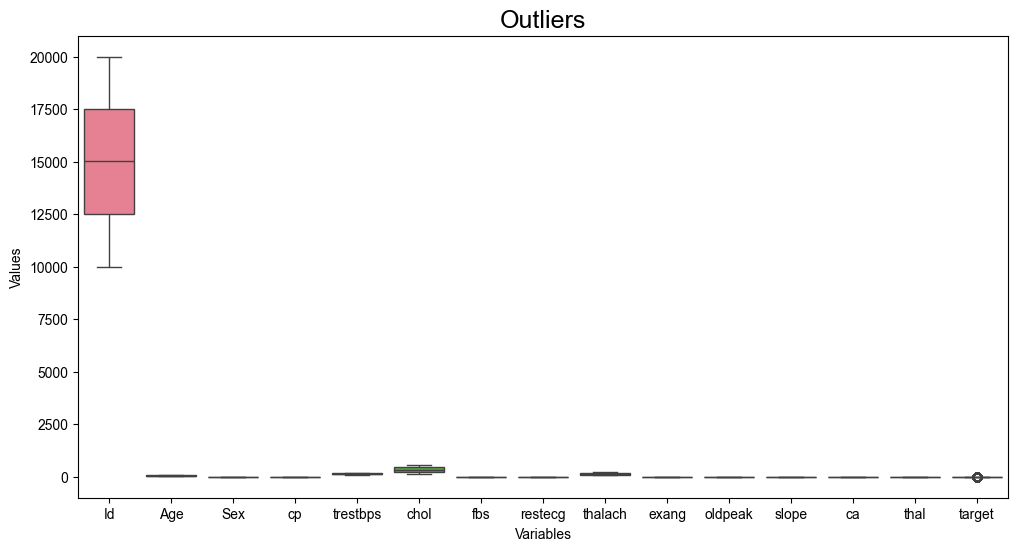

In [16]:
# Check for Outliers in Training Dataset
plt.figure(figsize = (12,6))
sns.boxplot(data=train_df)
sns.set(font_scale=1.5)
plt.title ('Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

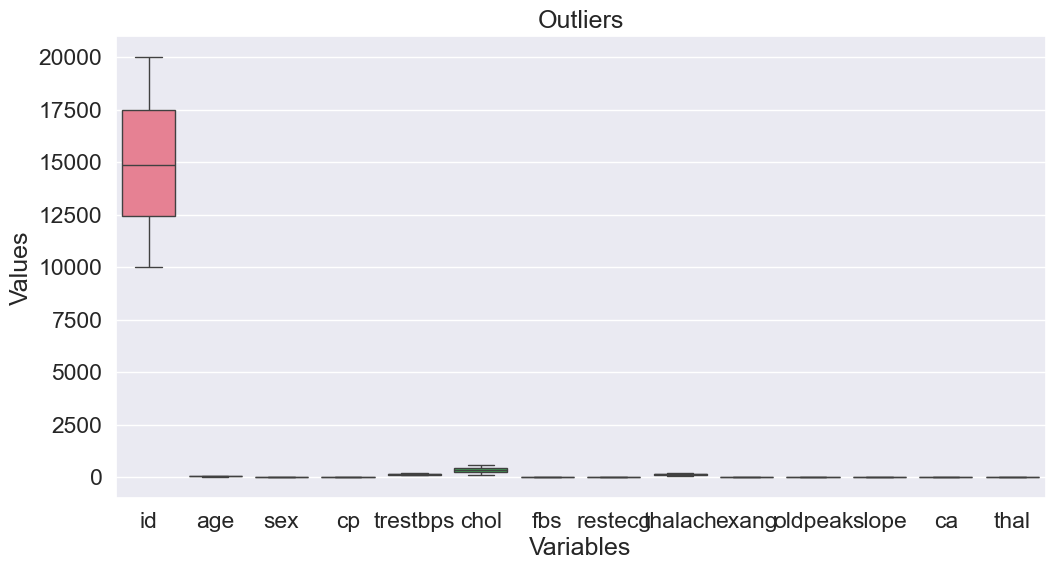

In [17]:
# Check for Outliers in Test Dataset
plt.figure(figsize = (12,6))
sns.boxplot(data=test_df)
sns.set(font_scale=1.5)
plt.title ('Outliers')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# Feature Engineering

In [18]:
train = train_df # saving the train dataframe
test = test_df # saving the test dataframe

In [19]:
train = train.drop(['Id'], axis=1)
test = test.drop(['id'], axis=1)

## Categorization and Dummy Variables

In [20]:
# Rename Train Columns
train.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
     

In [21]:
# Rename Test Columns
test.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']

In [22]:
# Structuring Train Dataset to right format
def convert_data_types(train):
    # Conversion of data type
    train['sex'] = train['sex'].replace({0: 'female', 1: 'male'})
    
    train['chest_pain_type'] = train['chest_pain_type'].replace({
        1: 'typical angina',
        2: 'atypical angina',
        3: 'non-anginal pain',
        4: 'asymptomatic'
    })
    
    train['fasting_blood_sugar'] = train['fasting_blood_sugar'].replace({
        0: 'lower than 120mg/ml',
        1: 'greater than 120mg/ml'
    })
    
    train['rest_ecg'] = train['rest_ecg'].replace({
        0: 'normal',
        1: 'ST-T wave abnormality',
        2: 'left ventricular hypertrophy'
    })
    
    train['exercise_induced_angina'] = train['exercise_induced_angina'].replace({
        0: 'no',
        1: 'yes'
    })
    
    train['st_slope'] = train['st_slope'].replace({
        1: 'upsloping',
        2: 'flat',
        3: 'downsloping'
    })
    
    train['thalassemia'] = train['thalassemia'].replace({
        1: 'normal',
        2: 'fixed defect',
        3: 'reversable defect'
    })
    
    return train

train = convert_data_types(train)
train.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,33,female,typical angina,158,205,greater than 120mg/ml,normal,154,no,1.5,upsloping,4,normal,1
1,53,male,atypical angina,198,154,lower than 120mg/ml,ST-T wave abnormality,104,no,0.8,flat,1,0,0
2,37,male,atypical angina,101,202,greater than 120mg/ml,normal,155,no,2.1,upsloping,3,normal,1
3,75,female,0,113,306,greater than 120mg/ml,left ventricular hypertrophy,88,yes,4.9,0,2,fixed defect,1
4,35,male,atypical angina,139,419,greater than 120mg/ml,ST-T wave abnormality,166,yes,0.9,flat,4,0,1


In [23]:
# Structuring Test Dataset to right format
def convert_data_types(test):
    # Conversion of data type
    test['sex'] = test['sex'].replace({0: 'female', 1: 'male'})
    
    test['chest_pain_type'] = test['chest_pain_type'].replace({
        1: 'typical angina',
        2: 'atypical angina',
        3: 'non-anginal pain',
        4: 'asymptomatic'
    })
    
    test['fasting_blood_sugar'] = test['fasting_blood_sugar'].replace({
        0: 'lower than 120mg/ml',
        1: 'greater than 120mg/ml'
    })
    
    test['rest_ecg'] = test['rest_ecg'].replace({
        0: 'normal',
        1: 'ST-T wave abnormality',
        2: 'left ventricular hypertrophy'
    })
    
    test['exercise_induced_angina'] = test['exercise_induced_angina'].replace({
        0: 'no',
        1: 'yes'
    })
    
    test['st_slope'] = test['st_slope'].replace({
        1: 'upsloping',
        2: 'flat',
        3: 'downsloping'
    })
    
    test['thalassemia'] = test['thalassemia'].replace({
        1: 'normal',
        2: 'fixed defect',
        3: 'reversable defect'
    })
    
    return test

test = convert_data_types(test)
test.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,70,male,0,163,495,lower than 120mg/ml,left ventricular hypertrophy,170,yes,2.0,upsloping,0,normal
1,61,male,0,131,238,lower than 120mg/ml,left ventricular hypertrophy,74,yes,4.9,flat,2,fixed defect
2,53,male,0,95,558,greater than 120mg/ml,ST-T wave abnormality,73,yes,0.7,upsloping,1,0
3,37,female,typical angina,178,287,lower than 120mg/ml,ST-T wave abnormality,192,yes,5.7,upsloping,0,0
4,35,female,non-anginal pain,104,281,lower than 120mg/ml,normal,122,no,1.3,upsloping,4,reversable defect


In [24]:
#Creation of labels
target = train['target']

train = train.drop('target', axis = 1)
     

In [25]:

#Using Dummy variables to convert categorical to boolean
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)
train.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,33,158,205,154,1.5,4,False,False,False,True,False,False,True,False,False,True,False,True,False
1,53,198,154,104,0.8,1,True,True,False,False,True,False,False,False,True,False,False,False,False
2,37,101,202,155,2.1,3,True,True,False,False,False,False,True,False,False,True,False,True,False
3,75,113,306,88,4.9,2,False,False,False,False,False,True,False,True,False,False,True,False,False
4,35,139,419,166,0.9,4,True,True,False,False,False,False,False,True,True,False,False,False,False


## Data Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

def standardize_numeric_features(df):
    # Select numeric features
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Standardize numeric features
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df


# Standardize numeric features and combine back
train = standardize_numeric_features(train)
train.head()


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,-1.422113,0.339337,-1.082671,0.458684,-0.910004,1.404493,False,False,False,True,False,False,True,False,False,True,False,True,False
1,-0.012173,1.625618,-1.483352,-0.852298,-1.300839,-0.722488,True,True,False,False,True,False,False,False,True,False,False,False,False
2,-1.140125,-1.493613,-1.106241,0.484904,-0.575002,0.695499,True,True,False,False,False,False,True,False,False,True,False,True,False
3,1.538762,-1.107729,-0.289166,-1.271812,0.988337,-0.013494,False,False,False,False,False,True,False,True,False,False,True,False,False
4,-1.281119,-0.271646,0.598618,0.773320,-1.245005,1.404493,True,True,False,False,False,False,False,True,True,False,False,False,False


In [27]:
def standardize_numeric_features(df):
    # Select numeric features
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Standardize numeric features
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df


# Standardize numeric features and combine back
test = standardize_numeric_features(test)
test.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,1.180311,0.542359,1.186502,0.885296,-0.631450,-1.454633,True,False,False,False,True,True,False,True,False,True,False,True,False
1,0.553060,-0.502201,-0.833280,-1.613872,0.971054,-0.023089,True,False,False,False,True,True,False,True,True,False,True,False,False
2,-0.004496,-1.677331,1.681623,-1.639905,-1.349814,-0.738861,True,False,False,False,False,False,False,True,False,True,False,False,False
3,-1.119610,1.031997,-0.448186,1.458022,1.413124,-1.454633,False,False,False,True,True,False,False,True,False,True,False,False,False
4,-1.258999,-1.383549,-0.495340,-0.364288,-1.018261,1.408454,False,False,True,False,True,False,True,False,False,True,False,False,True


# Model Building

In [28]:
# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=42)

## Random Forest Classifier

In [29]:
# Random Forest1 Model Training
"""
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

grid_search.best_params_, accuracy
"""


"\n# Initialize the Random Forest classifier\nrf_model = RandomForestClassifier(random_state=42)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    'n_estimators': [100, 200, 300],\n    'max_depth': [None, 10, 20, 30],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)\ngrid_search.fit(X_train, y_train)\n\n# Best parameters and accuracy\nbest_rf_model = grid_search.best_estimator_\ny_pred = best_rf_model.predict(X_val)\naccuracy = accuracy_score(y_val, y_pred)\n\ngrid_search.best_params_, accuracy\n"

In [30]:
# Using Trained Model
best_rf_model = RandomForestClassifier(random_state=42,max_depth= 10,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 200)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_val)

### Model Evaluation

In [31]:
# Metrics print out
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8240930869267625
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.12      0.19       260
           1       0.84      0.98      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.68      0.55      0.55      1461
weighted avg       0.78      0.82      0.78      1461



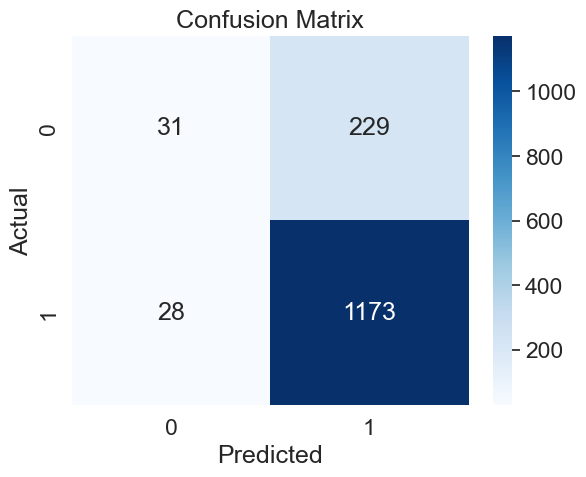

In [32]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

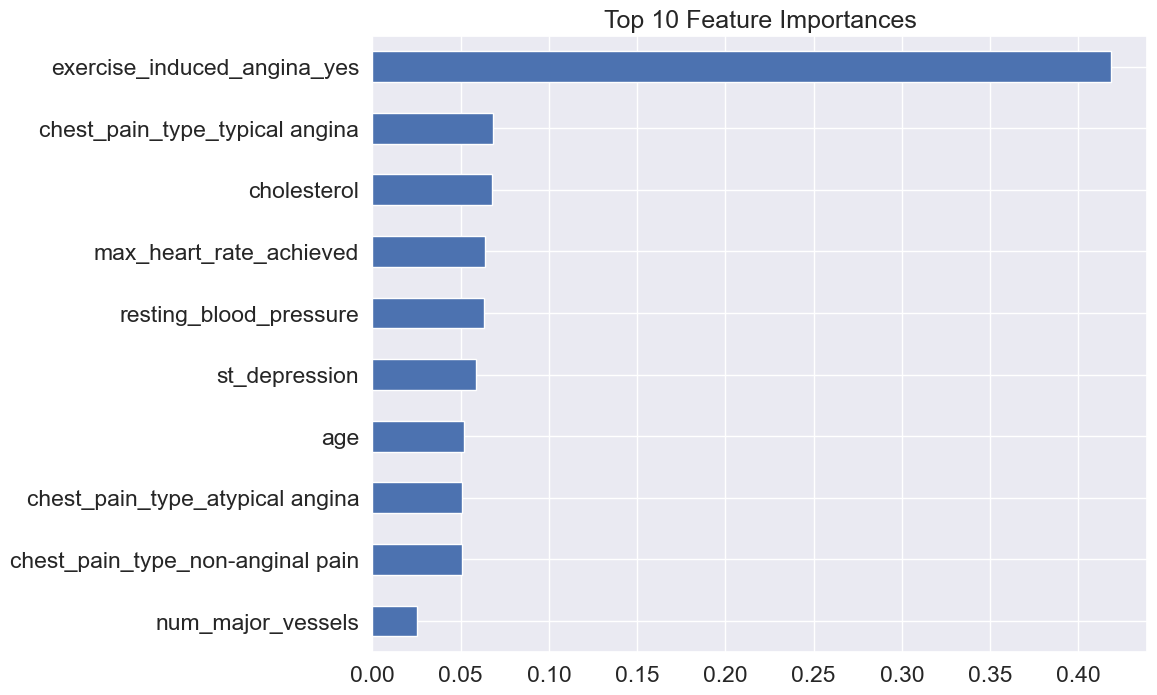

In [33]:
# Get the feature importances from the classifier
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)
#feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
top_10_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.show()

In [34]:
# Cross-validate the RF model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {np.mean(cv_scores)}")

Cross-Validation Accuracy Scores: [0.81779299 0.81094953 0.82106164 0.81421233 0.81506849]
Mean CV Accuracy Score: 0.8158169961446969


## Xgboost Classifier

In [35]:
# Training Xgboost Model
"""
# Create the XGBoost model
xgb_model = XGBClassifier(random_state=42) 

# Define the parameter grid to search through

param_grid = {
    'learning_rate': [0.01, 0.1],         # Step size shrinkage
    'n_estimators': [100, 200,300],                 # Number of boosting rounds
    'max_depth': [1, 2, 5,],                    # Maximum tree depth
    'min_child_weight': [1, 3],                   # Minimum sum of instance weight (hessian) in a child
    'gamma': [0, 0.1, 0.2],                          # Minimum loss reduction required to make a further partition
    'subsample': [0.6, 0.8],                    # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8],             # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.01, 0.1],                     # L1 regularization term on weights
    'reg_lambda': [1, 1.5],                       # L2 regularization term on weights
}

# Create the grid search object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5,verbose=1, n_jobs=-1)

# Now you can fit the grid search on your data
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_xgb)
grid_search.best_params_, accuracy
"""

"\n# Create the XGBoost model\nxgb_model = XGBClassifier(random_state=42) \n\n# Define the parameter grid to search through\n\nparam_grid = {\n    'learning_rate': [0.01, 0.1],         # Step size shrinkage\n    'n_estimators': [100, 200,300],                 # Number of boosting rounds\n    'max_depth': [1, 2, 5,],                    # Maximum tree depth\n    'min_child_weight': [1, 3],                   # Minimum sum of instance weight (hessian) in a child\n    'gamma': [0, 0.1, 0.2],                          # Minimum loss reduction required to make a further partition\n    'subsample': [0.6, 0.8],                    # Subsample ratio of the training instance\n    'colsample_bytree': [0.6, 0.8],             # Subsample ratio of columns when constructing each tree\n    'reg_alpha': [0, 0.01, 0.1],                     # L1 regularization term on weights\n    'reg_lambda': [1, 1.5],                       # L2 regularization term on weights\n}\n\n# Create the grid search object\ngrid_se

In [36]:
# Trained Model
best_xgb_model = XGBClassifier(random_state=42,colsample_bytree=0.6,gamma=0.2,learning_rate=0.1,max_depth=2,min_child_weight=3,n_estimators=100,reg_alpha=0.1,reg_lambda=1.5,subsample=0.6)   
best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred_xgb)

### Model Evaluation

In [37]:
# Metrics print out
print("Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_pred_xgb))

Accuracy: 0.8199863107460643
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.17      0.25       260
           1       0.84      0.96      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.66      0.57      0.57      1461
weighted avg       0.78      0.82      0.78      1461



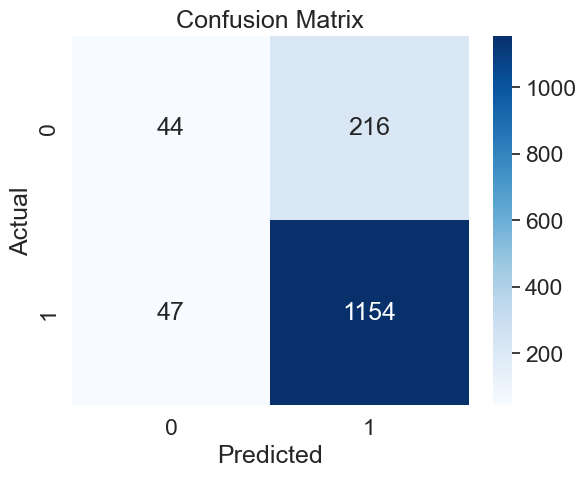

In [38]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# Cross-validate the model
cv_scores = cross_val_score(best_xgb_model, X_train,y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {np.mean(cv_scores)}")


Cross-Validation Accuracy Scores: [0.81266039 0.81266039 0.82534247 0.81335616 0.82106164]
Mean CV Accuracy Score: 0.8170162121940073


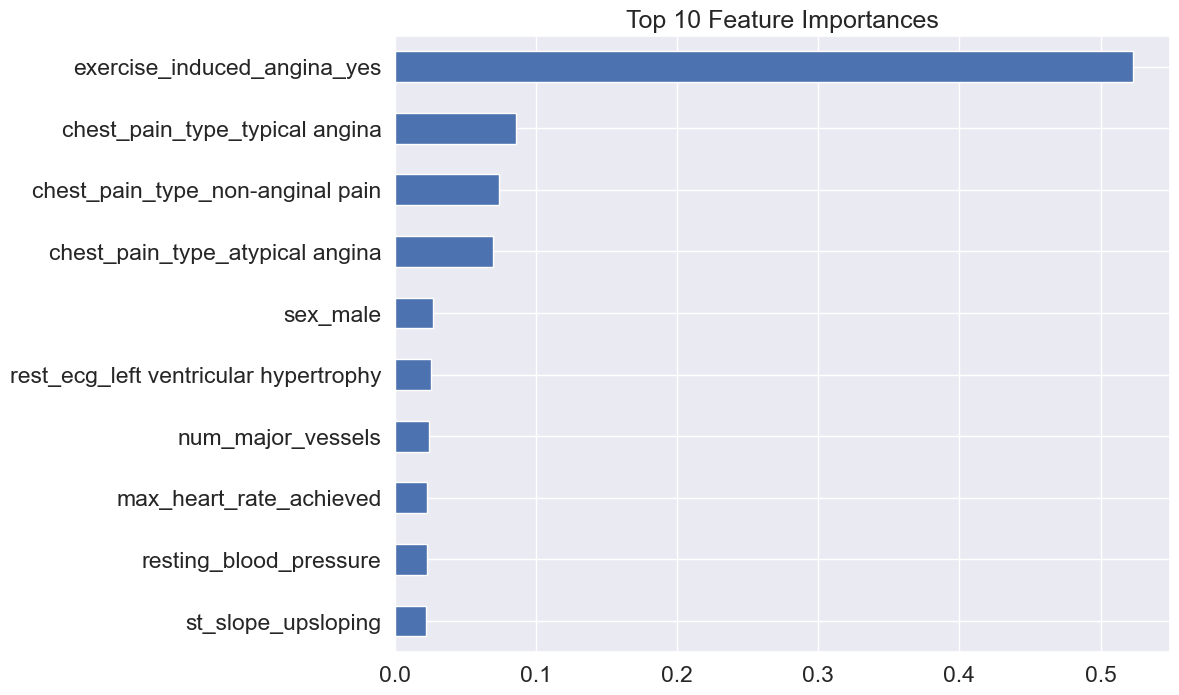

In [40]:
# Get the feature importances from the classifier
feature_importances = pd.Series(best_xgb_model.feature_importances_, index=X_train.columns)
#feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 10
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 10 feature importances
top_10_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.show()

## Leading Model on Leaderboard (SVM Light Feature Engineering, Followed by Random Forest)

In [41]:
# We will use train2 and test2 dataset
 # Rename columns in the train dataset to conform with test dataset

train_df.rename(columns={'Id': 'id', 'Age': 'age', 'Sex': 'sex'}, inplace=True)

### Light Feature Engineering

In [42]:
def feature_engineering(df):
    # Interaction Feature: Age * Cholesterol
    df['age_chol'] = df['age'] * df['chol']

    # High Blood Pressure Indicator
    df['high_bp'] = df['trestbps'].apply(lambda x: 1 if x > 140 else 0)
    
    
    return df


train_df = feature_engineering(train_df)
train_df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_chol,high_bp
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,6765,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,8162,1
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,7474,0
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,22950,0
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,14665,0


In [43]:
def feature_engineering(df):
    # Interaction Feature: Age * Cholesterol
    df['age_chol'] = df['age'] * df['chol']

    # High Blood Pressure Indicator
    df['high_bp'] = df['trestbps'].apply(lambda x: 1 if x > 140 else 0)
    
    return df


test_df = feature_engineering(test_df)
test_df.head()


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age_chol,high_bp
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1,34650,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2,14518,0
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0,29574,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0,10619,1
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3,9835,0


In [44]:
# Dropping target variable from training data
y = train_df['target']
X = train_df.drop(['target','id'], axis=1)

In [45]:

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df.drop(['id'], axis=1))

## Random Forest Classifier2

In [47]:
# Model Training
"""
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [2, 10, 100],
    'max_depth': [None, 2, 10, 20],
    'min_samples_split': [1, 2, 5],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and accuracy
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)

grid_search.best_params_, accuracy
"""

"\n# Initialize the Random Forest classifier\nrf_model = RandomForestClassifier(random_state=42)\n\n# Hyperparameter tuning using GridSearchCV\nparam_grid = {\n    'n_estimators': [2, 10, 100],\n    'max_depth': [None, 2, 10, 20],\n    'min_samples_split': [1, 2, 5],\n    'min_samples_leaf': [1, 2, 4]\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)\ngrid_search.fit(X_train_scaled, y_train)\n\n# Best parameters and accuracy\nbest_rf_model = grid_search.best_estimator_\ny_pred = best_rf_model.predict(X_val_scaled)\naccuracy = accuracy_score(y_val, y_pred)\n\ngrid_search.best_params_, accuracy\n"

In [48]:
# Trained Model
best_rf_model2 = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=10,min_samples_leaf=1,min_samples_split=2)

### Model Evaluation

In [49]:
# Best parameters and accuracy
best_rf_model2.fit(X_train_scaled, y_train)
y_pred3 = best_rf_model2.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred3)
accuracy

0.8186173853524983

In [50]:
# Metrics print out
print("Accuracy:", accuracy_score(y_val, y_pred3))
print("Classification Report:\n", classification_report(y_val, y_pred3))


Accuracy: 0.8186173853524983
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.12      0.19       260
           1       0.84      0.97      0.90      1201

    accuracy                           0.82      1461
   macro avg       0.65      0.54      0.54      1461
weighted avg       0.77      0.82      0.77      1461



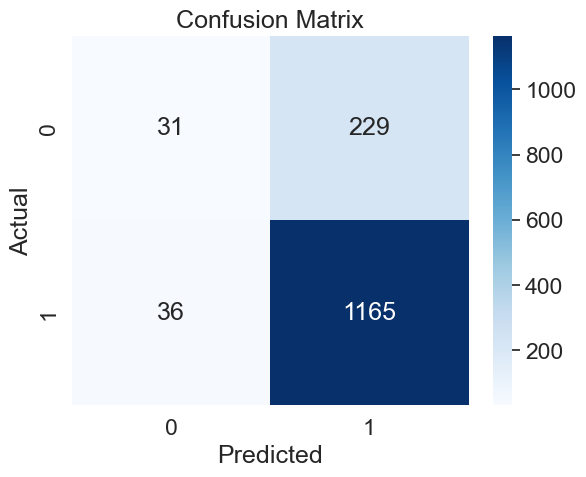

In [51]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
# Cross-validate the model
cv_scores = cross_val_score(best_rf_model2, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {np.mean(cv_scores)}")

Cross-Validation Accuracy Scores: [0.80923867 0.80153978 0.81335616 0.80393836 0.8125    ]
Mean CV Accuracy Score: 0.8081145927323435


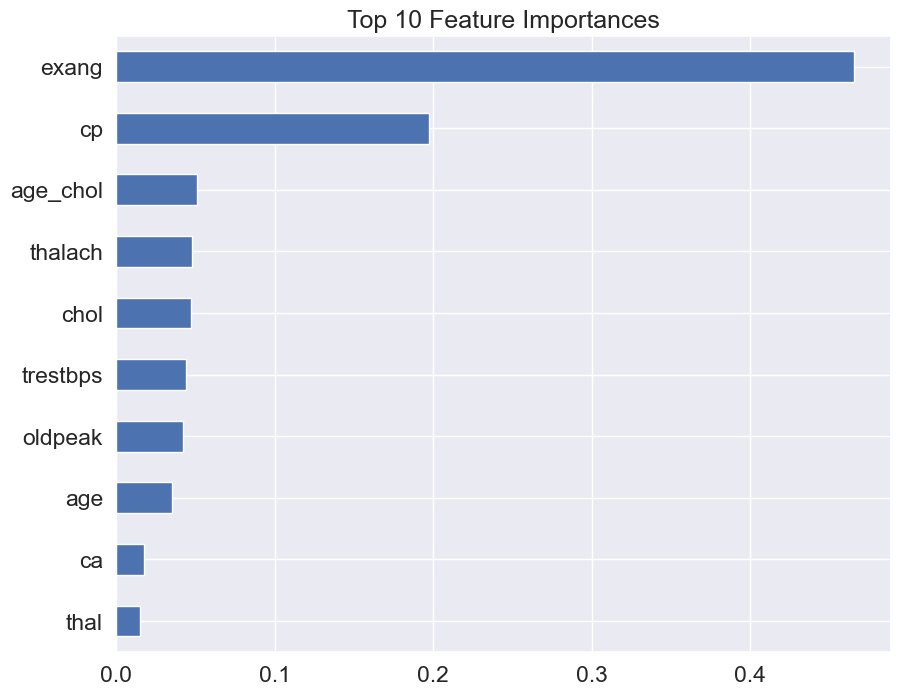

In [53]:
# Get the feature importances from the classifier
feature_importances = pd.Series(best_rf_model2.feature_importances_, index=X_train.columns)

# Sort the feature importances and select the top 20
top_10_features = feature_importances.sort_values(ascending=False).head(10)

# Plot the top 5 feature importances
top_10_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Feature Importances')
plt.show()

## Support Vector Machine 1

In [54]:

# Create an SVM classifier with RBF kernel and regularization parameter C=1.0
svm_model = svm.SVC(random_state=42, kernel='rbf', C=1.0)

# Fit the model to your training data
# X_train and y_train should be your features and target variable respectively
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
# X_test should be your test features
predictions = svm_model.predict(X_val_scaled)

# Evaluate the model
# y_test should be your test target variable
accuracy = svm_model.score(X_val_scaled, y_val)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8056125941136209


### Model Evaluation

In [55]:
# Metrics print out
print("Accuracy:", accuracy_score(y_val, predictions))
print("Classification Report:\n", classification_report(y_val, predictions))

Accuracy: 0.8056125941136209
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.29      0.35       260
           1       0.86      0.92      0.89      1201

    accuracy                           0.81      1461
   macro avg       0.64      0.60      0.62      1461
weighted avg       0.78      0.81      0.79      1461



In [56]:
# Cross-validate the RF model
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy Score: {np.mean(cv_scores)}")

Cross-Validation Accuracy Scores: [0.80667237 0.79640719 0.80565068 0.80565068 0.80222603]
Mean CV Accuracy Score: 0.8033213904871277


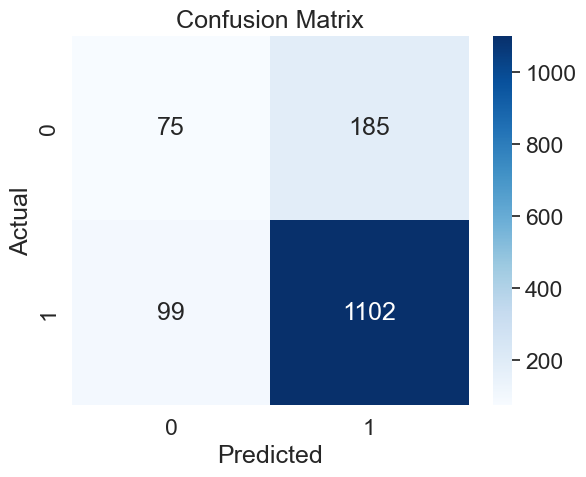

In [57]:
# Confusion matrix
cm = confusion_matrix(y_val, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Submission

In [58]:
## Making Predictions on Test Data
predictions = svm_model.predict(test_scaled)
baseline_sub = sample_sub.copy()
baseline_sub['Target'] = predictions
baseline_sub.to_csv('svm_Scaled9_model_30th.csv', index=False)

# Display the first few rows of the submission file
baseline_sub.head()

,Id,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,1
